In [31]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [15]:
df = pd.read_csv('precip.csv')
df
y = np.array(df.precip)

## Assume the data is Normally distributed.  Use a normal prior for mu(0,100) and an inverse-Gamma(0.01,0.01) for sigma2 (remember, this is for the variance....however, the data is described in terms of the standard deviation).  Use a seed of 69321 with a burn-in of 1000, and 2000 samples after burn-in (keep the default of 4 chains). What is the mean of the posterior distribution for mu? Keep answers to decimal places.

In [19]:
# Define the PyMC model
with pm.Model() as model:
    # Priors
    mu = pm.Normal('mu', mu=0, sigma=100)
    sigma2 = pm.InverseGamma('sigma2', alpha=0.001, beta=0.001)
    # Likelihood
    y_lik = pm.Normal('y_lik', mu=mu, sigma=pm.math.sqrt(sigma2), observed=y)
    # Sample posterior
    trace = pm.sample(draws=2000, 
                      tune=1000,
                      chains=4,
                      random_seed=69321)
    
az.summary(trace)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma2]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 44 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,34.882,1.694,31.803,38.114,0.019,0.019,8249.0,6041.0,1.0
sigma2,193.026,34.515,135.297,258.732,0.394,0.461,7928.0,5593.0,1.0


## What is the posterior median of sigma?  Sigma is the standard deviation of the Normal distribution.  You will first need to take the square root of sigma2 and then find the median.  Keep answer to two decimal places.

In [25]:
sig2 = np.sqrt(trace.posterior["sigma2"].values.flatten())
np.median(sig2)

np.float64(13.770393351636255)

## Get the posterior samples of the coefficient of variation (CV = sigma/mu....use both arrays....standard deviation/mean).  Once you have this distribution, find the probability that it is larger than 0.4.  Keep answers to two decimal places.

In [27]:
cv = sig2 / trace.posterior["mu"].values.flatten()
prob_cv_g_0_4 = np.mean(cv > 0.4)
print(f"Probability that cv > 0.4: {prob_cv_g_0_4:.4f}")

Probability that cv > 0.4: 0.4450


## Upload a histogram of your posterior distribution of CV.



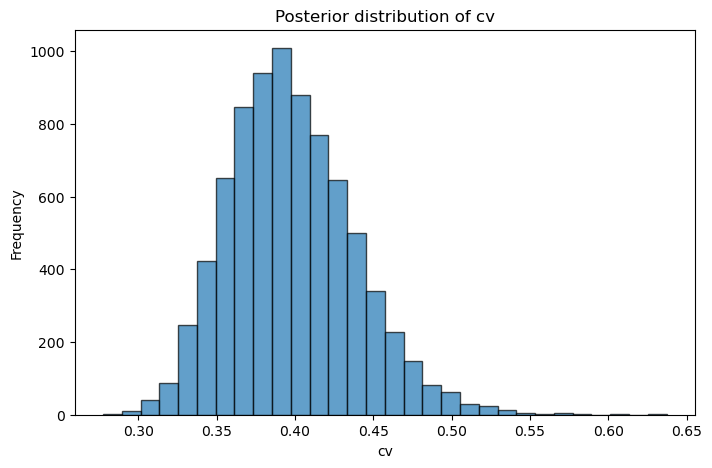

In [29]:
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(cv, bins=30, edgecolor='black', alpha=0.7)
plt.title("Posterior distribution of cv")
plt.xlabel("cv")
plt.ylabel("Frequency")
plt.show()

## Upload your visual MCMC chains for mu.



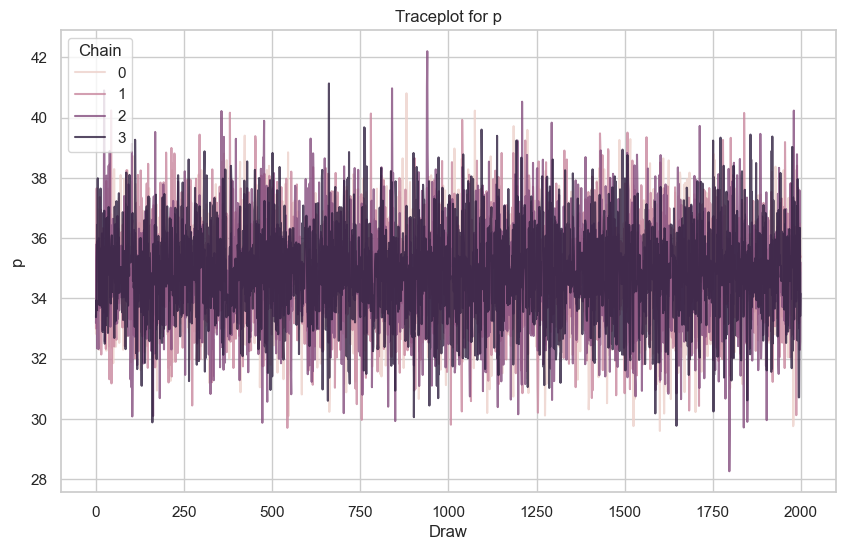

In [33]:
df_p = az.extract(trace, var_names=["mu"]).to_dataframe()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


sns.lineplot(data=df_p, x="draw", y="mu", hue="chain", alpha=0.8)

plt.xlabel("Draw")
plt.ylabel("p")
plt.title("Traceplot for p")
plt.legend(title="Chain")
plt.show()